In [1]:
from pylab import rand,plot,show,norm

def generateData(n):
 """ 
  generates a 2D linearly separable dataset with n samples. 
  The third element of the sample is the label
 """
 xb = (rand(n)*2-1)/2-0.5
 yb = (rand(n)*2-1)/2+0.5
 xr = (rand(n)*2-1)/2+0.5
 yr = (rand(n)*2-1)/2-0.5
 inputs = []
 for i in range(len(xb)):
  inputs.append([xb[i],yb[i],1])
  inputs.append([xr[i],yr[i],-1])
 return inputs

In [2]:

class Perceptron:
 def __init__(self):
  """ perceptron initialization """
  self.w = rand(2)*2-1 # weights
  self.learningRate = 1

 def response(self,x):
  """ perceptron output, only in 2-D """
  y = x[0]*self.w[0]+x[1]*self.w[1] # dot product between w and x
  if y >= 0:
   return 1
  else:
   return -1

 def updateWeights(self,x,iterError):
  """
   updates the weights status, w at time t+1 is
       w(t+1) = w(t) + learningRate*(d-r)*x
   where d is desired output and r the perceptron response
   iterError is (d-r)
  """
  self.w[0] += self.learningRate*iterError*x[0]
  self.w[1] += self.learningRate*iterError*x[1]

 def train(self,data):
  """ 
   trains all the vector in data.
   Every vector in data must have three elements,
   the third element (x[2]) must be the label (desired output)
  """
  learned = False
  iteration = 0
  while not learned:
   globalError = 0.0
   for x in data: # for each sample
    r = self.response(x)    
    if x[2] != r: # if we have a wrong response
     iterError = x[2] - r # desired response - actual response
     self.updateWeights(x,iterError)
     globalError += abs(iterError)
   iteration += 1
   if globalError == 0.0 or iteration >= 100: # stop criteria
    print ('iterations',iteration)
    learned = True # stop learning

('iterations', 2)


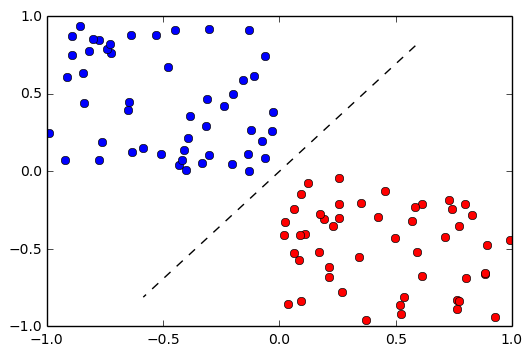

In [3]:
%matplotlib inline

trainset = generateData(100) # train set generation
perceptron = Perceptron()   # perceptron instance
perceptron.train(trainset)  # training
testset = generateData(50)  # test set generation

# Perceptron test
for x in testset:
 r = perceptron.response(x)
 if r != x[2]: # if the response is not correct
  print ('error')
 if r == 1:
  plot(x[0],x[1],'ob')  
 else:
  plot(x[0],x[1],'or')

# plot of the separation line.
# The separation line is orthogonal to w
n = norm(perceptron.w)
ww = perceptron.w/n
ww1 = [ww[1],-ww[0]]
ww2 = [-ww[1],ww[0]]
plot([ww1[0], ww2[0]],[ww1[1], ww2[1]],'--k')
show()

### N-D Perceptron

In [34]:
class Perceptron():
    def __init__(self, N, M, nepoch=100, learning_rate=0.1):
        self._N = N # dimension
        self._M = M # numbe example
        self.nepoch = nepoch # number of epochs
        self.learning_rate = learning_rate # learing rate of the algo
        self._global_err = list() # lsit of error
        self._proba = 0 # proba to fail or suceed

    def global_err(self):
        return self._global_err
    

    def proba(self):
        return self._proba
    

    def training(self,data):
        ## Data
        x_,y_,w_ = data

        # Learning
        for epoch in range(self.nepoch):
            err  = 0
            out_ = F(w_, x_)
            for i_batch in range(self._M):
                yi = y_[i_batch]
                if yi * out_[i_batch] < 0:
                    dw_ = yi * x_[i_batch]
                    w_ += self.learning_rate * dw_
                    err += 1
            self.global_err.append(err / self._M)
            if err == 0:
                self._proba += 1
                break

In [46]:
def generateData(M,N) :
    x_ = np.random.randn(M, N)
    x_ = np.concatenate((np.ones((M, 1)), x_), axis=1)
    y_  = 2 * np.random.randint(low=0, high=2, size=M) - 1
    w_  = np.random.uniform(low=-1, high=1, size=N + 1)
    return x_,y_,w_

def F(w_, x_):
    """Fonction de décision"""
    return np.sign(np.sum(w_ * x_, axis=1))

In [37]:
import numpy as np
N = 100
alpha_max = 3.0
alpha_min = 1.5
nstep = 30
step = (alpha_max - alpha_min) / nstep
alpha = np.arange(alpha_min, alpha_max + step, step)
seed = 42
nepoch = 1000
learning_rate = 0.1

In [48]:
global_proba = list()
for a in alpha:
    print('Current alpha =', a)
    nperceptron = 30
    perceptrons = list()
    for iperceptron in range(nperceptron):
        M = int(a * N)
        perceptrons.append(Perceptron(N, M, nepoch=nepoch, learning_rate=learning_rate) )
        

    for p in perceptrons:
        p.training(generateData(M,N))
    

    proba = list()
    for p in perceptrons:
        proba.append(p.proba)

    current_proba = np.sum(proba) / nperceptron
    global_proba.append(current_proba)
    # print('with probability:', current_proba)
    if current_proba == 0:
        break

Current alpha = 1.5
Current alpha = 1.55
Current alpha = 1.6
Current alpha = 1.65
Current alpha = 1.7
Current alpha = 1.75
Current alpha = 1.8
Current alpha = 1.85
Current alpha = 1.9
Current alpha = 1.95
Current alpha = 2.0
Current alpha = 2.05
Current alpha = 2.1


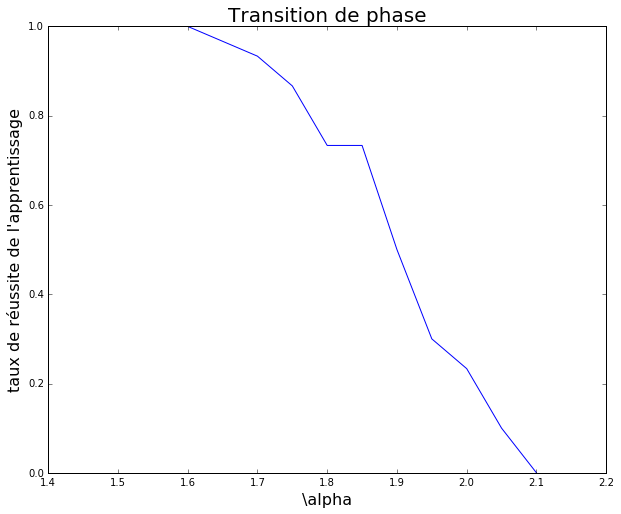

In [50]:
import pylab
if len(alpha) != len(global_proba):
    alpha = alpha[:len(global_proba)]
pylab.figure(figsize=(10,8))
pylab.plot(alpha, global_proba)
pylab.xlabel(r'\alpha', fontsize=16)
pylab.ylabel('taux de réussite de l\'apprentissage', fontsize=16)
pylab.title('Transition de phase', fontsize=20)
pylab.show()